In [20]:
from macrograd.base import Value
from macrograd.nn import Neuron, Layer, MLP
import numpy as np
import random
import matplotlib.pyplot as plt

In [21]:
np.random.seed(1337)
random.seed(1337)

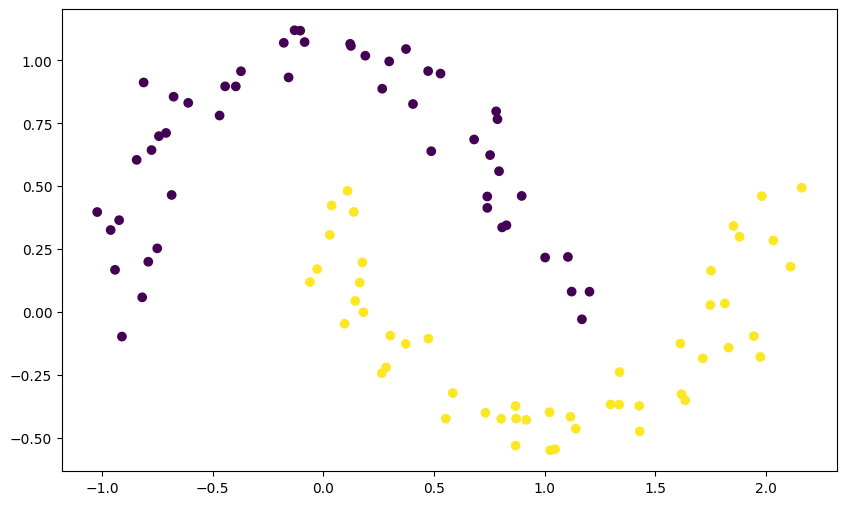

In [22]:
# make up a dataset
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2-1
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [28]:
classification_model = MLP(2, [20, 16, 1])

In [29]:
print(f'Number of parameters: {len(classification_model.get_parameters())}')

Number of parameters: 413


In [32]:
from tqdm import tqdm
for epoch in range(100):
    ypred = [classification_model(xa) for xa in X]
    losses = [(1 + -yi*ypredi).relu() for yi, ypredi in zip(y, ypred)] # HINGE LOSS FROM SVM, closer pred is to true y, lower the loss
    data_loss = sum(losses) * (1.0 / len(losses))

    l2_reg_alpha = 1e-4
    reg_loss = l2_reg_alpha * sum(classification_model.get_parameters())
    final_loss = data_loss + reg_loss

    accuracy = sum([(y_true > 0) == (y_pred.data > 0) for y_true, y_pred in zip(y, ypred)]) / len(ypred)
    classification_model.zero_grad()
    final_loss.backward()

    learning_rate = 1.0 - 0.9 * epoch / 100
    for parameter in classification_model.get_parameters():
        parameter.data -= learning_rate * parameter.grad

    print(f"epoch {epoch} loss {final_loss.data}, accuracy {accuracy*100}%")

epoch 0 loss 0.2830068547796, accuracy 88.0%
epoch 1 loss 0.20626900445815718, accuracy 91.0%
epoch 2 loss 0.17041995873772095, accuracy 92.0%
epoch 3 loss 0.1694539413131954, accuracy 94.0%
epoch 4 loss 0.1938215603205407, accuracy 92.0%
epoch 5 loss 0.159624227337652, accuracy 93.0%
epoch 6 loss 0.17001050660939648, accuracy 93.0%
epoch 7 loss 0.21708182975810927, accuracy 92.0%
epoch 8 loss 0.36180797293450695, accuracy 86.0%
epoch 9 loss 0.303441884422354, accuracy 89.0%
epoch 10 loss 0.14196979747498611, accuracy 94.0%
epoch 11 loss 0.11385319459067575, accuracy 96.0%
epoch 12 loss 0.10126779592894833, accuracy 96.0%
epoch 13 loss 0.1019850115832538, accuracy 97.0%
epoch 14 loss 0.12989779561956313, accuracy 94.0%
epoch 15 loss 0.24335484548404346, accuracy 91.0%
epoch 16 loss 0.2507440735290464, accuracy 90.0%
epoch 17 loss 0.10919332080077834, accuracy 96.0%
epoch 18 loss 0.08393596020208982, accuracy 97.0%
epoch 19 loss 0.08720443379005945, accuracy 97.0%
epoch 20 loss 0.078311

(-1.548639298268643, 1.951360701731357)

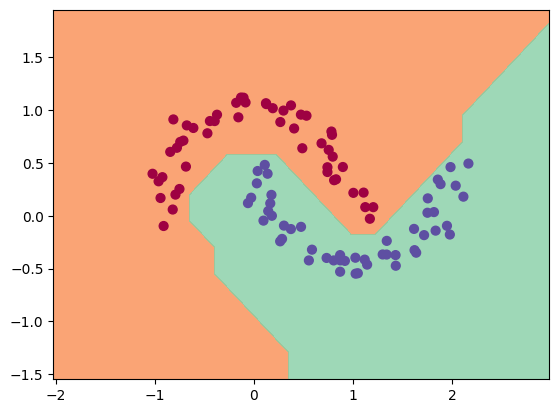

In [33]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(classification_model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())